# Baseball predictions

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [72]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'baseball.csv')
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
data.shape

(30, 17)

In [4]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Checking for the Null values

In [5]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

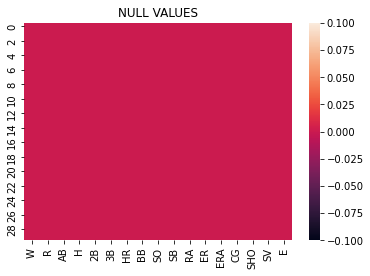

In [6]:
sns.heatmap(data.isnull())
plt.title('NULL VALUES')
plt.show()

So we dont have any null values in the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Exploration of the dataset

#### Bivariate analysis

<AxesSubplot:xlabel='W', ylabel='R'>

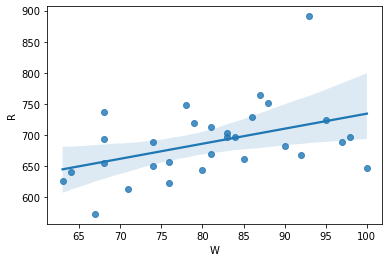

In [8]:
sns.regplot(data=data,  x='W', y ='R')

<AxesSubplot:xlabel='W', ylabel='AB'>

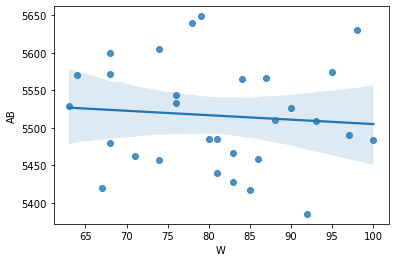

In [9]:
sns.regplot(data=data,  x='W', y='AB')

<AxesSubplot:xlabel='W', ylabel='H'>

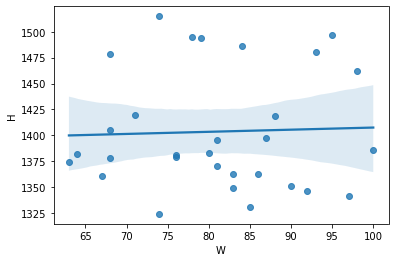

In [10]:
sns.regplot(data=data, x ='W', y ='H')

<AxesSubplot:xlabel='W', ylabel='2B'>

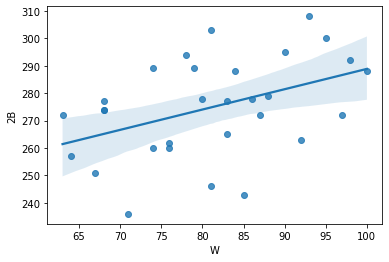

In [11]:
sns.regplot(data=data, x ='W', y ='2B')

<AxesSubplot:xlabel='W', ylabel='3B'>

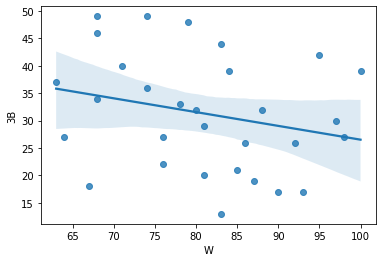

In [12]:
sns.regplot(data=data, x ='W', y ='3B')

<AxesSubplot:xlabel='W', ylabel='HR'>

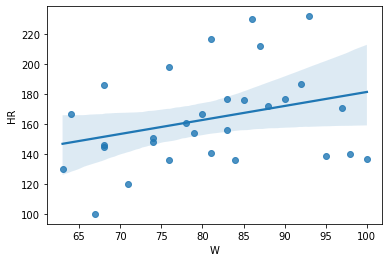

In [13]:
sns.regplot(data=data, x ='W', y ='HR')

<AxesSubplot:xlabel='W', ylabel='BB'>

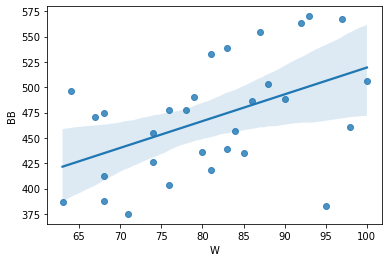

In [14]:
sns.regplot(data=data, x ='W', y ='BB')

<AxesSubplot:xlabel='W', ylabel='SO'>

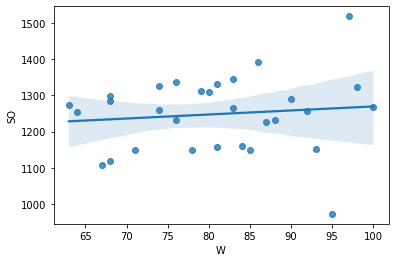

In [15]:
sns.regplot(data=data, x ='W', y ='SO')

<AxesSubplot:xlabel='W', ylabel='SB'>

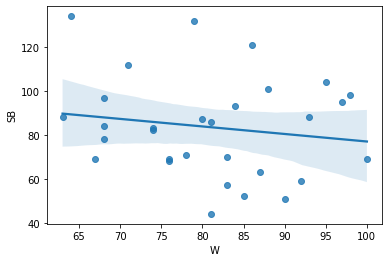

In [16]:
sns.regplot(data=data, x ='W', y ='SB')

<AxesSubplot:xlabel='W', ylabel='RA'>

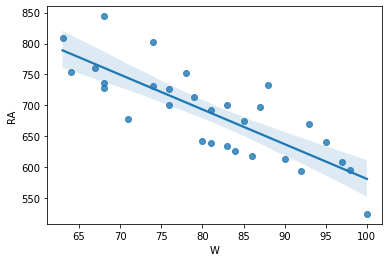

In [17]:
sns.regplot(data=data, x ='W', y ='RA')

<AxesSubplot:xlabel='W', ylabel='ER'>

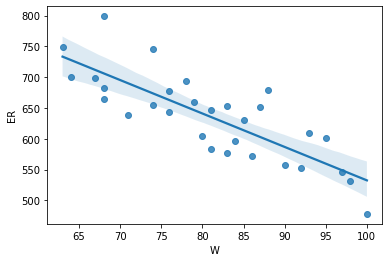

In [18]:
sns.regplot(data=data, x ='W', y ='ER')

<AxesSubplot:xlabel='W', ylabel='ERA'>

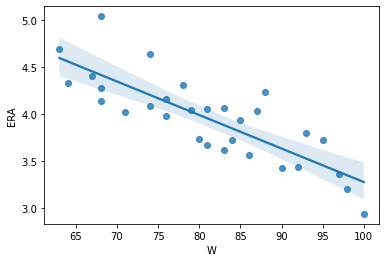

In [19]:
sns.regplot(data=data, x ='W', y ='ERA')

<AxesSubplot:xlabel='W', ylabel='CG'>

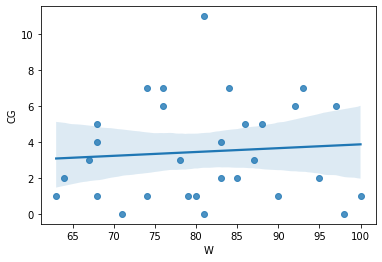

In [20]:
sns.regplot(data=data, x ='W', y ='CG')

<AxesSubplot:xlabel='W', ylabel='SHO'>

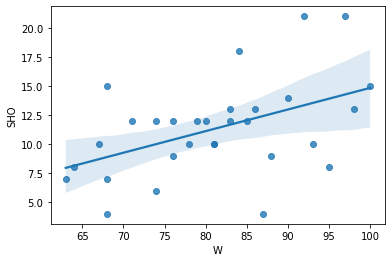

In [21]:
sns.regplot(data=data, x ='W', y ='SHO')

<AxesSubplot:xlabel='W', ylabel='SV'>

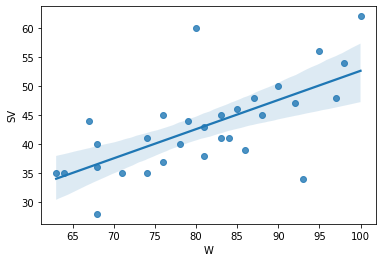

In [22]:
sns.regplot(data=data, x ='W', y ='SV')

<AxesSubplot:xlabel='W', ylabel='E'>

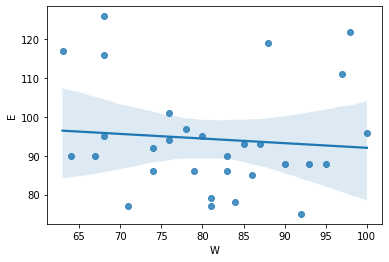

In [23]:
sns.regplot(data=data, x ='W', y ='E')

## Multivariate Analysis

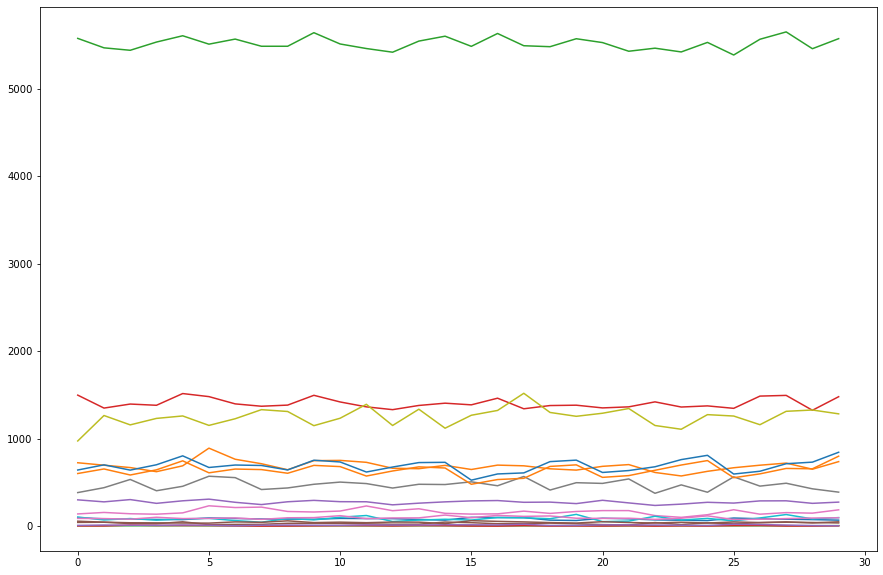

In [24]:
plt.figure(figsize=(15,10))
plt.plot(data)

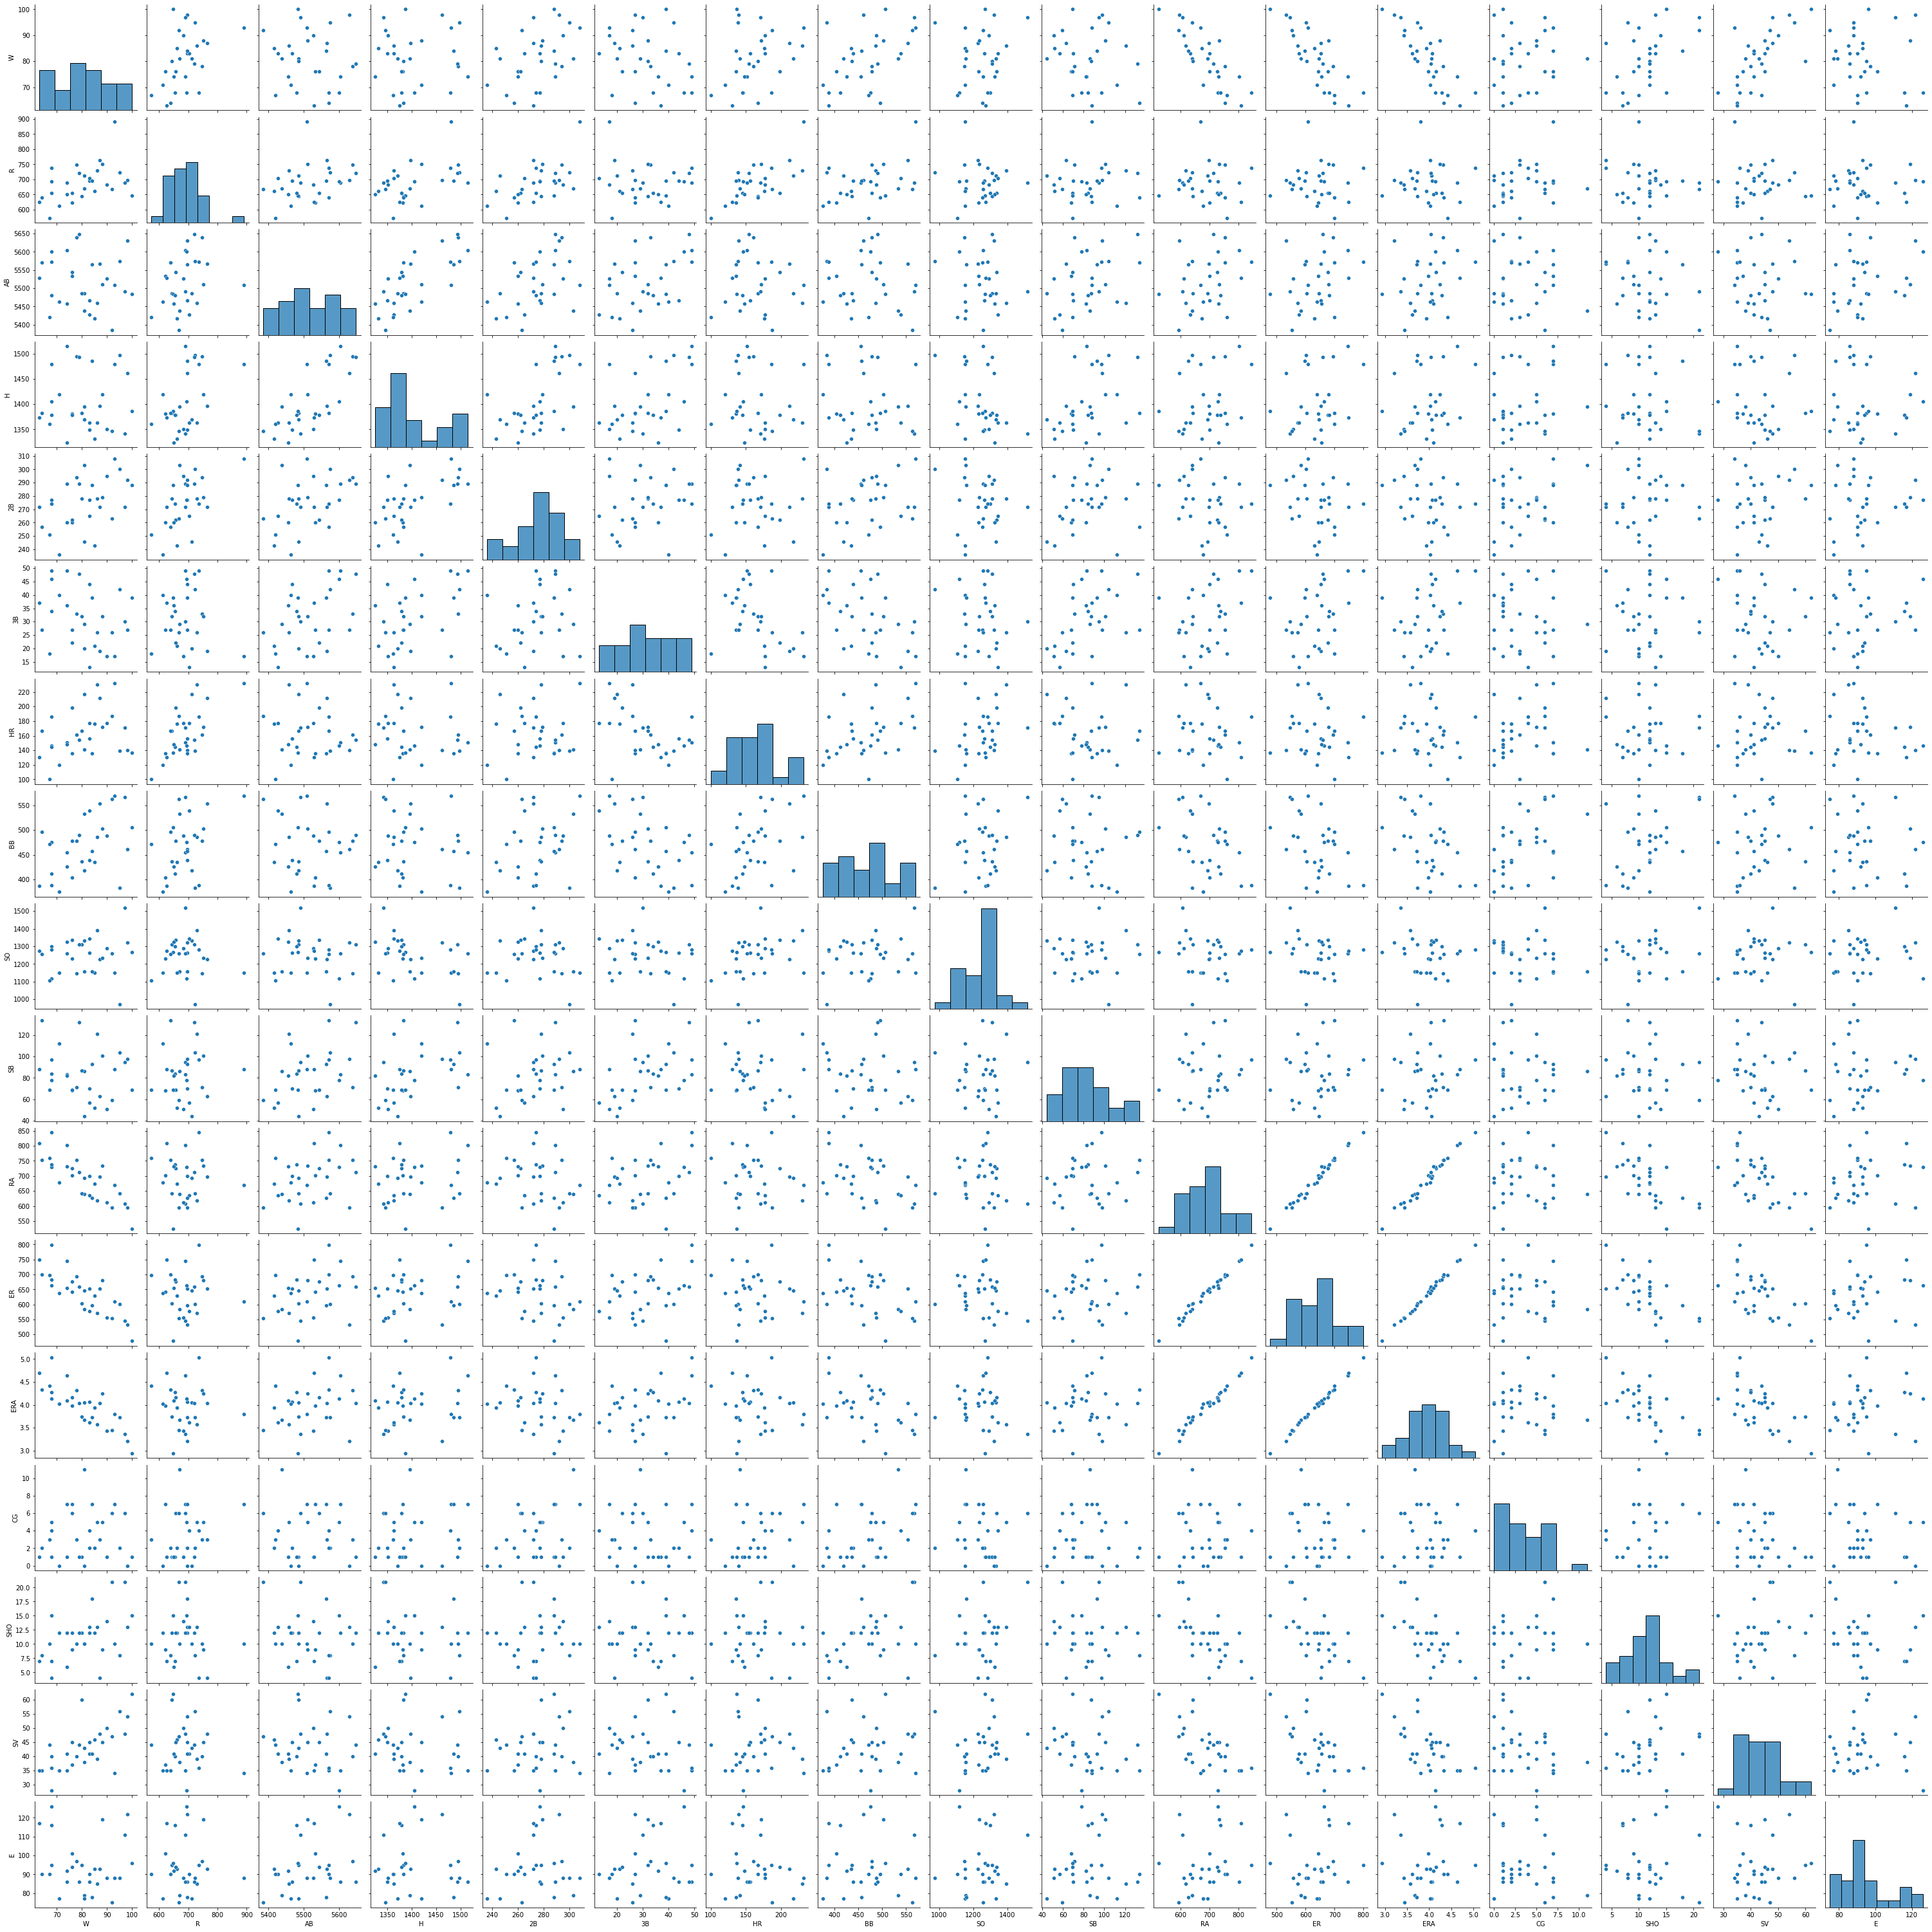

In [25]:
sns.pairplot(data)

In [26]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Here we can see that the Std is very high means the data is much spreaded here , there are might be the chances that the datset may contain outliers and also skewness

# Correlation Analysis

In [27]:
dfcor = data.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


## Showing the heatmap with the correlation

<AxesSubplot:>

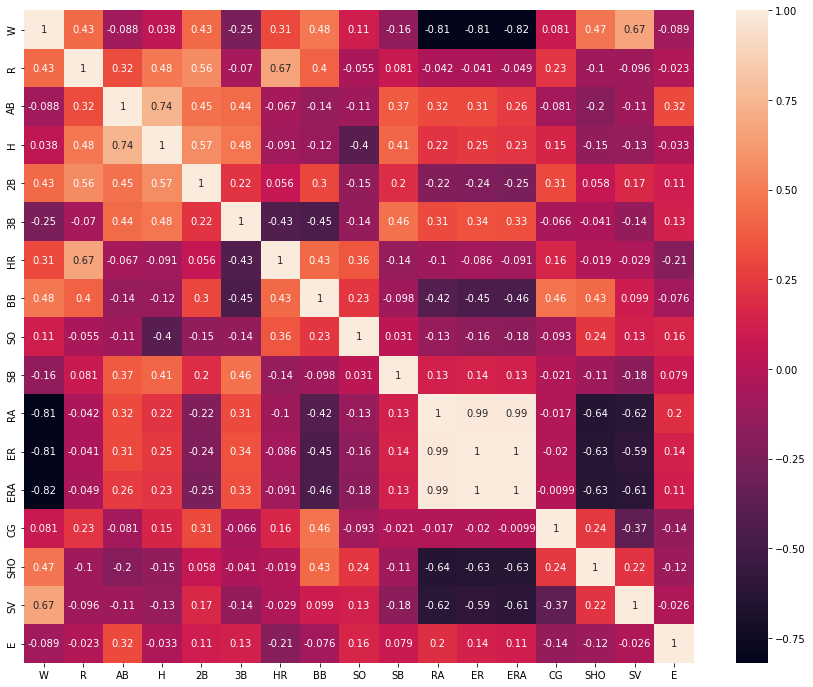

In [28]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)

# Covariance Analysis

In [29]:
data.cov()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,109.274713,264.594253,-64.783908,22.466667,80.921839,-27.437931,102.263218,288.865517,121.317241,-37.500000,-612.785057,-593.488506,-3.890471,2.326437,20.320690,54.829885,-13.057471
R,264.594253,3452.943678,1322.832184,1621.285057,595.547126,-43.037931,1255.295402,1349.251724,-333.668966,109.086207,-176.366667,-169.994253,-1.314977,37.680460,-25.003448,-44.567816,-19.080460
AB,-64.783908,1322.832184,4965.650575,2976.128736,578.108046,320.710345,-150.209195,-548.441379,-775.193103,599.068966,1605.728736,1530.666667,8.177218,-15.749425,-57.289655,-58.983908,311.563218
H,22.466667,1621.285057,2976.128736,3265.085057,586.112644,285.903448,-165.211494,-385.606897,-2364.627586,539.000000,924.285057,1011.954023,5.998230,23.363218,-34.268966,-58.622989,-26.459770
2B,80.921839,595.547126,578.108046,586.112644,327.443678,41.703448,32.416092,312.510345,-283.048276,80.517241,-284.659770,-298.942529,-2.094115,15.335632,4.324138,24.432184,26.712644
3B,-27.437931,-43.037931,320.710345,285.903448,41.703448,109.251724,-143.334483,-271.306897,-153.131034,109.086207,236.755172,249.431034,1.570793,-1.903448,-1.782759,-11.710345,18.482759
HR,102.263218,1255.295402,-150.209195,-165.211494,32.416092,-143.334483,1012.722989,772.900000,1188.455172,-99.155172,-238.428736,-191.787356,-1.313805,13.763218,-2.506897,-7.147126,-92.218391
BB,288.865517,1349.251724,-548.441379,-385.606897,312.510345,-271.306897,772.900000,3255.127586,1383.186207,-128.017241,-1713.265517,-1811.465517,-11.913069,72.917241,100.141379,44.648276,-60.275862
SO,121.317241,-333.668966,-775.193103,-2364.627586,-283.048276,-153.131034,1188.455172,1383.186207,10766.027586,73.310345,-970.737931,-1176.172414,-8.498207,-26.786207,101.627586,103.124138,224.689655
SB,-37.500000,109.086207,599.068966,539.000000,80.517241,109.086207,-99.155172,-128.017241,73.310345,520.534483,217.637931,228.948276,1.306034,-1.310345,-10.017241,-32.931034,25.206897


<AxesSubplot:>

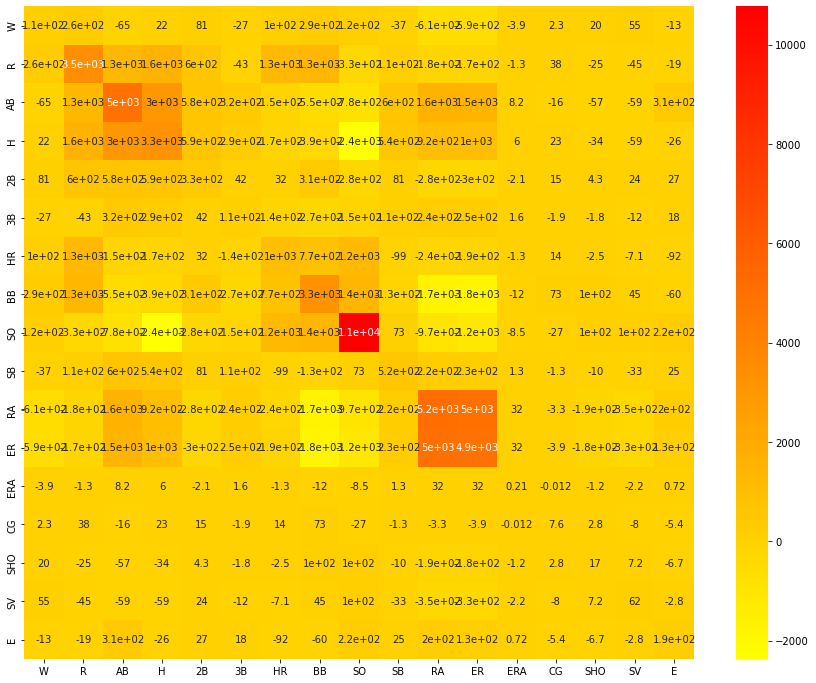

In [30]:
plt.figure(figsize=(15,12))
sns.heatmap(data.cov(),annot=True, cmap='autumn_r')

# Checking for the Outliers

<AxesSubplot:>

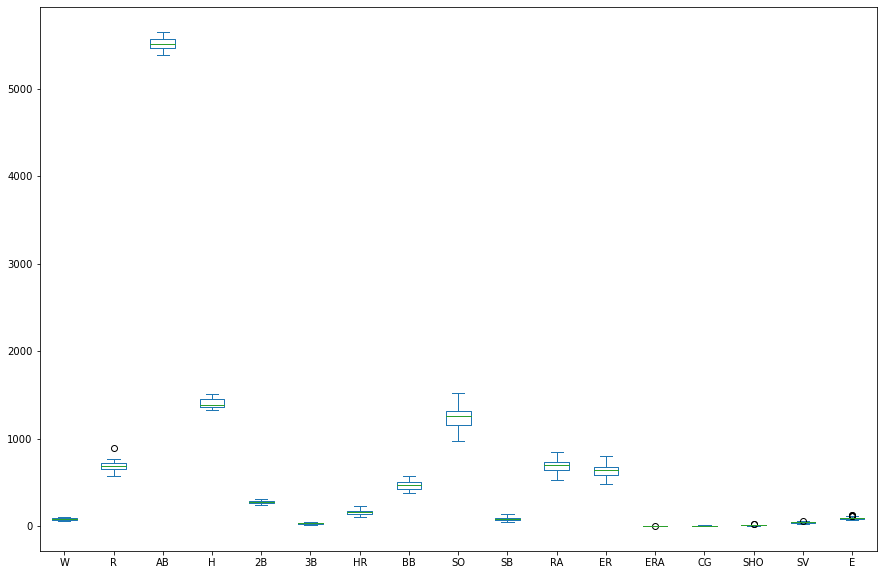

In [31]:
data.plot(kind='box', figsize=(15,10))

So we can see that R , ERA, SHO, SV and E has the some of the outliers

<AxesSubplot:xlabel='R'>

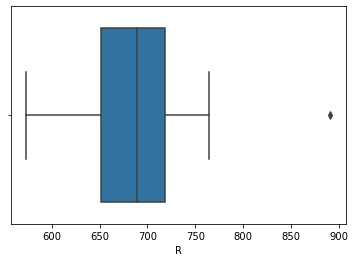

In [32]:
sns.boxplot(data=data, x='R')

<AxesSubplot:xlabel='SHO'>

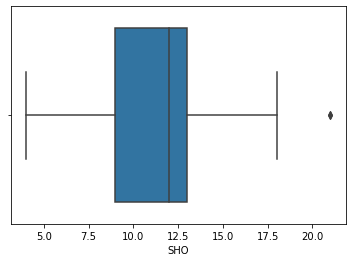

In [33]:
sns.boxplot(data=data, x='SHO', orient='v')

<AxesSubplot:xlabel='ERA'>

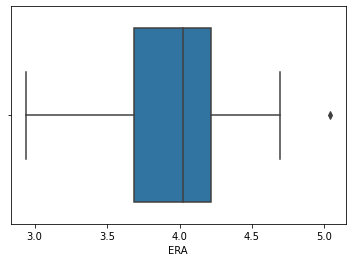

In [34]:
sns.boxplot(data=data, x='ERA')

<AxesSubplot:xlabel='E'>

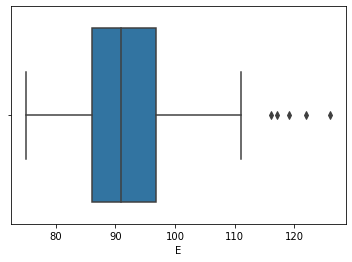

In [35]:
sns.boxplot(data=data, x='E')

E has the max of the outliers

### Checking for the skewness in the Dataset

In [36]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

so we can see that some of the columns are very highly skewed data cols

### Data Cleaning

### Removing the Outliers

In [37]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print('old_dataframe:',data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print('new_dataframe:',data_final.shape)

old_dataframe: (30, 17)
new_dataframe: (29, 17)


In [38]:
data_final.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [39]:
# Let's check the the data loss
data_loss = (30-29)/30*100
data_loss

3.3333333333333335

# Splitting into x and y

In [40]:
x =data_final.drop(['W'], axis=1)
y = data_final.iloc[:,0]

In [41]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

### Transforming & removing the skewness

In [42]:
from sklearn.preprocessing  import power_transform
x=power_transform(x,method='yeo-johnson')

In [43]:
x

array([[ 9.62543504e-01,  8.38257983e-01,  4.16333634e-16,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052224e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01, -6.92877447e-01, -2.49800181e-16,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800488e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01, -1.11045984e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213881e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  2.59829043e

In [44]:
#Lets Again Check the Skewness
x= pd.DataFrame(x)

In [45]:
x.skew()

0    -0.024842
1     0.081092
2     0.000000
3    -0.052793
4    -0.075139
5     0.000448
6    -0.008572
7     0.051530
8    -0.009570
9    -0.011974
10   -0.004988
11   -0.000401
12   -0.045947
13    0.000529
14   -0.000925
15    0.065585
dtype: float64

Now we can see that the skewness is being removed from the dataset

### Ploting all the Normal distribution plots

<Figure size 1008x720 with 0 Axes>

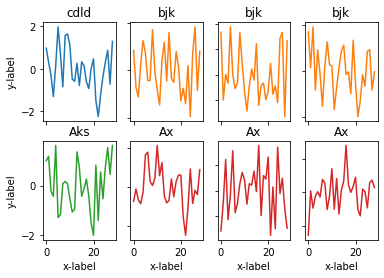

In [46]:
plt.figure(figsize=(14,10))
fig, axs = plt.subplots(2,4)
axs[0, 0].plot(x[0])
axs[0, 0].set_title('cdld')
axs[0, 1].plot(x[1], 'tab:orange')
axs[0, 1].set_title('bjk')
axs[0, 2].plot(x[2], 'tab:orange')
axs[0, 2].set_title('bjk')
axs[0, 3].plot(x[3], 'tab:orange')
axs[0, 3].set_title('bjk')

axs[1, 0].plot(x[4], 'tab:green')
axs[1, 0].set_title('Aks')
axs[1, 1].plot(x[5], 'tab:red')
axs[1, 1].set_title('Ax')
axs[1, 2].plot(x[6], 'tab:red')
axs[1, 2].set_title('Ax')
axs[1, 3].plot(x[7], 'tab:red')
axs[1, 3].set_title('Ax')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

### Plotting Displot Through Iteration

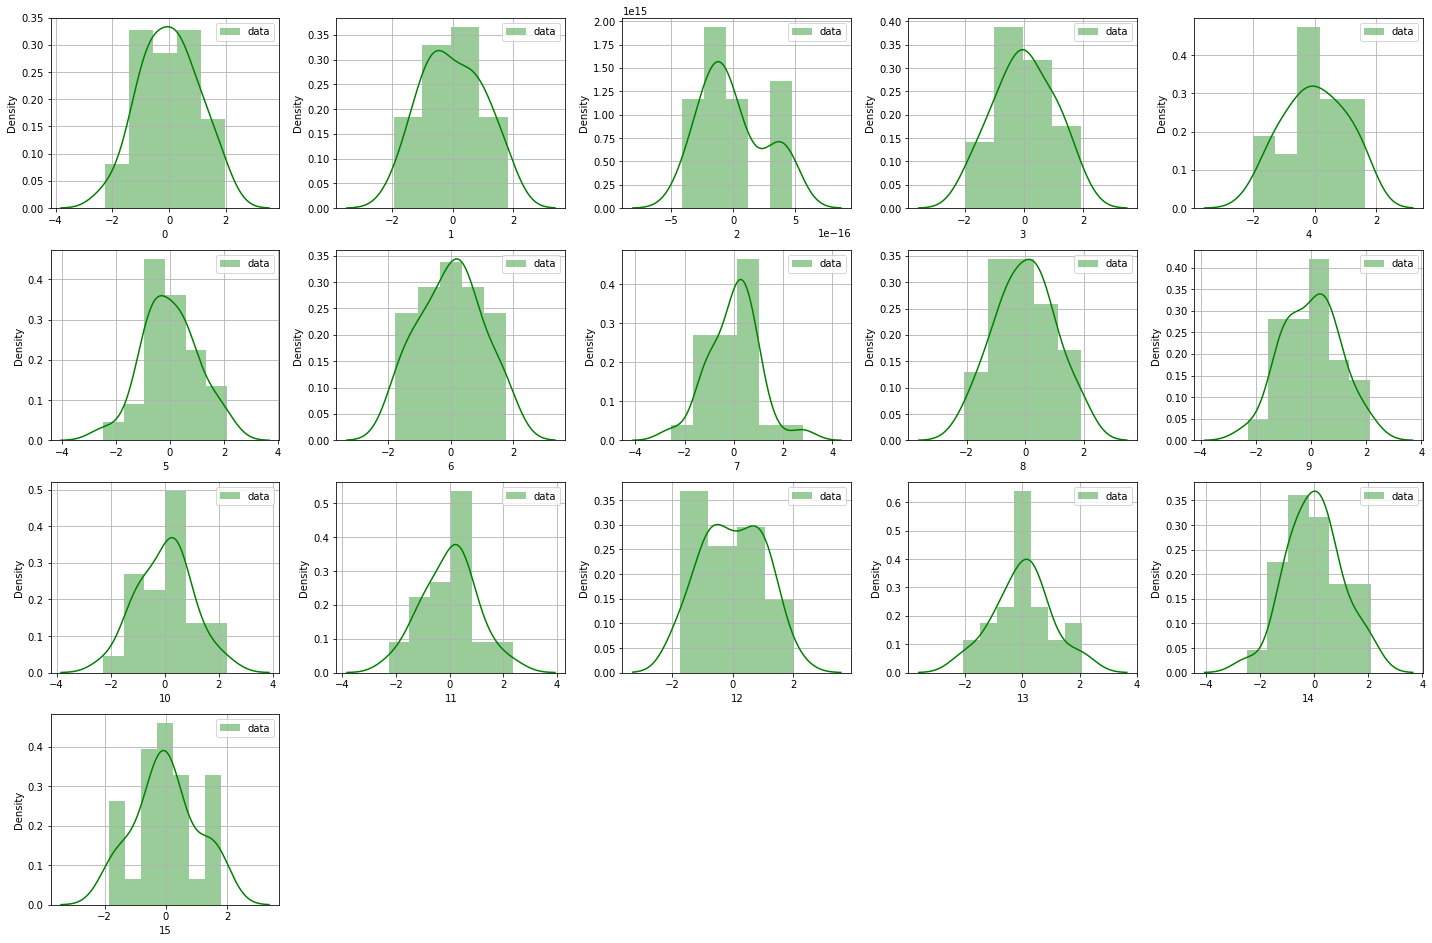

In [47]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(x.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(x[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

# Data preprocessing

####  Feature extraction
using the Variance threshold method

In [48]:
from sklearn.feature_selection import VarianceThreshold
# we are  importing  the  sklearn's  feature  selection technique  here  to extract  some imp  feature   from  the  model
var_thres = VarianceThreshold(threshold=0.0)
var_thres.fit(x)

VarianceThreshold()

In [49]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [50]:
x.columns[var_thres.get_support()]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

This says us that all number column are important thus we cannot drop them

In [52]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.962544,0.838258,4.163336e-16,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.660979,-0.508052,-0.509292,-0.307098,-0.787002,1.532753,-0.348265
1,0.298863,-0.692877,-2.498002e-16,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.160226,0.235800,0.241440,-0.307098,0.236737,0.312020,-0.540820
2,-0.312105,-1.110460,0.000000e+00,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.674967,-0.752214,-0.642098,2.011315,-0.252844,-0.664137,-1.326125
3,-1.308298,0.259829,-8.326673e-17,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.174077,0.093091,0.043013,1.264463,-0.513555,-0.820689,0.650818
4,0.137737,1.243468,4.718448e-16,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.575971,1.555853,1.493491,1.264463,0.236737,-1.149165,-0.540820


## Checking for the VIF

In [53]:
import numpy as np
import pandas  as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
def  calcvif(x):
    vif =pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [55]:
x = x.iloc[:,:-1]
calcvif(x) 

,variables,VIF factor
0,0,6.164201
1,1,11.643149
2,2,7.520564
3,3,3.432153
4,4,3.010161
5,5,7.733151
6,6,3.221411
7,7,2.943874
8,8,2.077185
9,9,189.453824


As we can se that the 9, 10, 11 has the max VIF so we need to drop it one by one

In [56]:
x.drop([10], axis=1,inplace=True)

As for now we have dropped the highest VIF

In [57]:
x = x.iloc[:,:-1]
calcvif(x) 

,variables,VIF factor
0,0,3.925351
1,1,3.189362
2,2,7.426561
3,3,2.856287
4,4,2.906020
5,5,4.434660
6,6,3.128731
7,7,2.614997
8,8,1.800314
9,9,92.843734


### Splitting the Data into train & test
Choosing the best Random state

In [58]:
from sklearn.metrics import r2_score, mean_squared_error

In [66]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.839973029482551 on random_state: 99


In [67]:
x_train.shape

(22, 13)

In [68]:
y_train.shape

(22,)

In [69]:
# doing  train test  split
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.22, random_state=99)

### Using the Linear Regression model

In [73]:
# Checking R2 score for Linear Regression model
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

# prediction
predlr= lr.predict(x_test)
print('R2_Score:',r2_score(y_test,predlr))
print('Mean abs error:',mean_absolute_error(y_test, predlr))
print('Mean squared error:',mean_squared_error(y_test, predlr))

R2_Score: 0.34858454722621446
Mean abs error: 7.282841811407472
Mean squared error: 88.37979449061484


In [74]:
lr.intercept_

80.44815587153548

In [75]:
lr.coef_

array([ 6.69077151e+00, -1.71250688e+00,  8.37590248e-15, -1.22179383e-01,
        4.98462778e-01,  1.29611593e+00, -3.16674845e+00,  7.36612712e-01,
        4.71913446e-01,  3.28263727e+00, -1.44483807e+01,  1.63583423e+00,
       -1.10661007e-01])

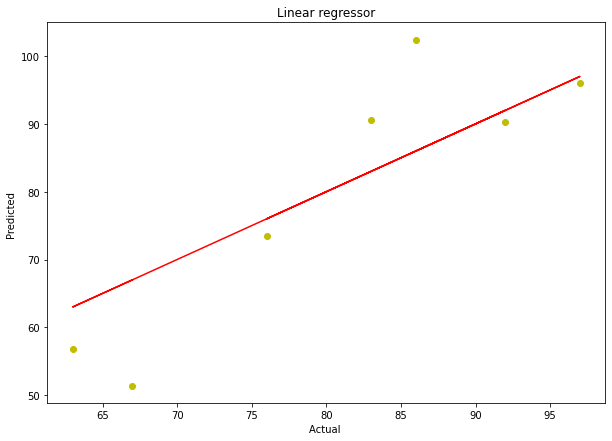

In [76]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,7))
plt.scatter(x=y_test,y=predlr,color='y')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title("Linear regressor")
plt.show()

# Random forest Regressor

In [110]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=900, random_state=99, max_depth=4, bootstrap=True, verbose=1)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


R2_Score: 0.7961569865130269
Mean abs error: 4.423352564983511
Mean squared error: 27.656088850232607


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    0.0s finished


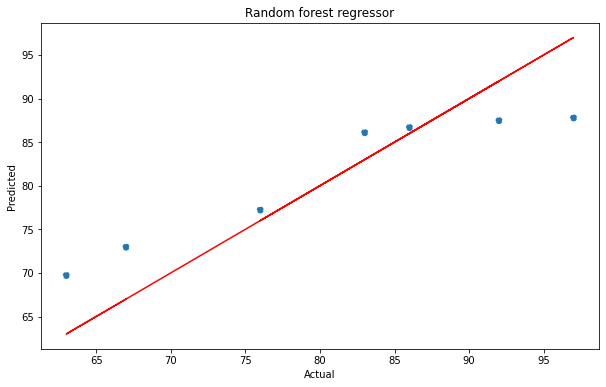

In [81]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predRFR, linestyle='--')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random forest regressor")
plt.show()

# KNN Regressor

In [85]:
# Checking R2 score for KNN regressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))

R2_Score: 0.751672683513839
Mean abs error: 4.857142857142855
Mean squared error: 33.691428571428546


Text(0.5, 1.0, 'K-nearest neighbors regressor')

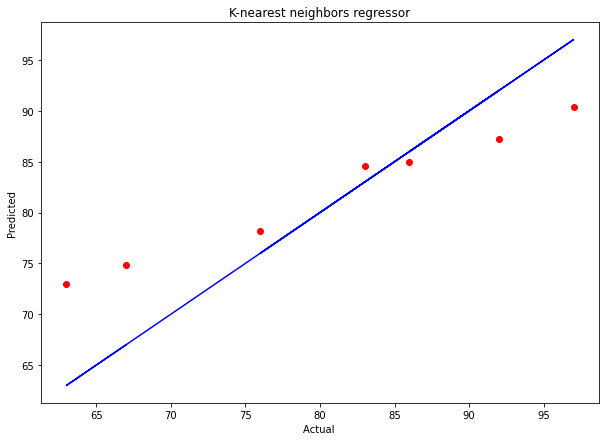

In [87]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,7))
plt.scatter(x=y_test,y=predknn,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual ")
plt.ylabel("Predicted")
plt.title("K-nearest neighbors regressor")

# Support Vector regressor

In [88]:
from sklearn.svm import SVR

In [91]:
sv= SVR(kernel='linear', max_iter=400)
sv.fit(x_train,y_train)

#prediction
predsv=sv.predict(x_test)
print('R2_Score:',r2_score(y_test,predsv))
print('Mean abs error:',mean_absolute_error(y_test, predsv))
print('Mean squared error:',mean_squared_error(y_test, predsv))

R2_Score: 0.794706467790425
Mean abs error: 3.801397087559916
Mean squared error: 27.852885757739898


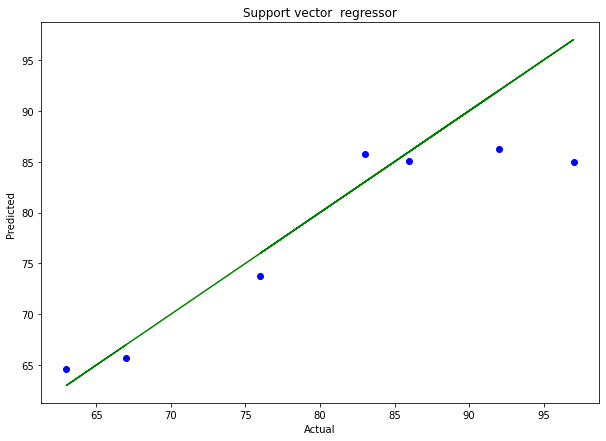

In [92]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,7))
plt.scatter(x=y_test,y=predsv,color='b')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted ")
plt.title("Support vector  regressor")
plt.show()

# Gradient Boosting Regressor

In [97]:
# Checking R2 score for svr
from sklearn.ensemble import GradientBoostingRegressor
Gb= GradientBoostingRegressor(n_estimators=500,  random_state=99, learning_rate=1, max_depth=4)
Gb.fit(x_train,y_train)

#prediction
predGb=Gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predGb))
print('Mean abs error:',mean_absolute_error(y_test, predGb))
print('Mean squared error:',mean_squared_error(y_test, predGb))

R2_Score: 0.42979894162771015
Mean abs error: 8.215603174603173
Mean squared error: 77.36115583793844


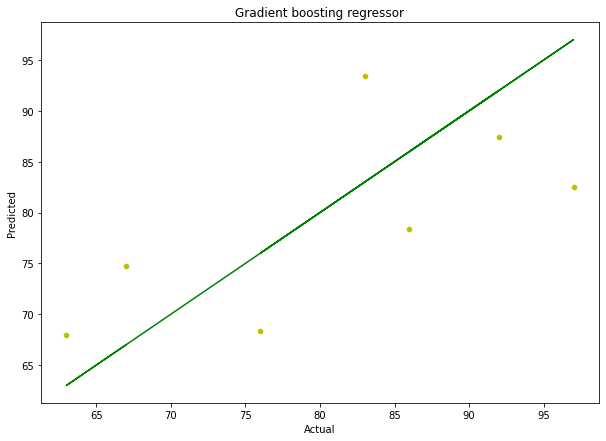

In [99]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,7))
sns.scatterplot(x=y_test,y=predGb,color='y')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Gradient boosting regressor")
plt.show()

Till now we can see that Random forest regrresor is performing the best with a R2 score of 79.6 % which is the highest thus still there are chances that- the models are Overfitted so we have to perform the cross validation

# Cross validation of each model

In [111]:
from sklearn.model_selection import cross_val_score

In [119]:
# Linear Regression
cross_val_score(lr,x,y,cv=7).mean()

0.20791267878289604

In [120]:
# Random forest Regressor
cross_val_score(RFR,x,y,cv=7).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

-0.20012697798825455

In [118]:
# Knn regressor
cross_val_score(knn,x,y,cv=7).mean()

0.2530403488492416

In [121]:
# SVR Regression
cross_val_score(sv,x,y,cv=7).mean()

0.39849954684697364

In [123]:
# Gradient boosting
cross_val_score(Gb,x,y,cv=7).mean()# 

-1.8801863537922985

## Hyperparameter tuning
#### Grid Search CV in Support Vector Regressor

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import numpy as np
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
grs = GridSearchCV(svr, parameters,refit = True, verbose = 3)
grs.fit(x_train,y_train)
grs.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear;, score=0.442 total time=   0.0s
[CV 2/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear;, score=0.036 total time=   0.0s
[CV 3/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear;, score=0.432 total time=   0.0s
[CV 4/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear;, score=0.353 total time=   0.0s
[CV 5/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear;, score=0.031 total time=   0.0s
[CV 1/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf;, score=-0.391 total time=   0.0s
[CV 2/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf;, score=-0.272 total time=   0.0s
[CV 3/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf;, score=-0.757 total time=   0.0s
[CV 4/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf;, score=-0.300 total time=   0.0s
[CV 5/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf;, score=-0.006 total time=   0.0s
[CV 1/5] END C=1.5

[CV 1/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=linear;, score=0.458 total time=   0.0s
[CV 2/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=linear;, score=0.053 total time=   0.0s
[CV 3/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=linear;, score=0.491 total time=   0.0s
[CV 4/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=linear;, score=0.335 total time=   0.0s
[CV 5/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=linear;, score=0.051 total time=   0.0s
[CV 1/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=rbf;, score=-0.391 total time=   0.0s
[CV 2/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=rbf;, score=-0.272 total time=   0.0s
[CV 3/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=rbf;, score=-0.757 total time=   0.0s
[CV 4/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=rbf;, score=-0.300 total time=   0.0s
[CV 5/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=rbf;, score=-0.006 total time=   0.0s
[CV 1/5] END C=1.5, epsilon=0.3, gamma=1e-07, kernel=poly;, score=-0.391 total t

[CV 4/5] END C=10, epsilon=0.5, gamma=1e-07, kernel=linear;, score=0.078 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.5, gamma=1e-07, kernel=linear;, score=-3.755 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.5, gamma=1e-07, kernel=rbf;, score=-0.391 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.5, gamma=1e-07, kernel=rbf;, score=-0.272 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.5, gamma=1e-07, kernel=rbf;, score=-0.757 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.5, gamma=1e-07, kernel=rbf;, score=-0.300 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.5, gamma=1e-07, kernel=rbf;, score=-0.006 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.5, gamma=1e-07, kernel=poly;, score=-0.391 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.5, gamma=1e-07, kernel=poly;, score=-0.272 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.5, gamma=1e-07, kernel=poly;, score=-0.757 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.5, gamma=1e-07, kernel=poly;, score=-0.300 total time=   0.0s
[

{'C': 1.5, 'epsilon': 0.5, 'gamma': 1e-07, 'kernel': 'linear'}

In [125]:
grs.best_params_

{'C': 1.5, 'epsilon': 0.5, 'gamma': 1e-07, 'kernel': 'linear'}

In [126]:
Best_mod = SVR(C=1.5, epsilon= 0.5, gamma= 1e-07, kernel= 'linear')
Best_mod.fit(x_train, y_train)

SVR(C=1.5, epsilon=0.5, gamma=1e-07, kernel='linear')

In [128]:
svrpred = Best_mod.predict(x_test)

acc = r2_score(y_test,svrpred)
print(acc*100)

71.37861256777732


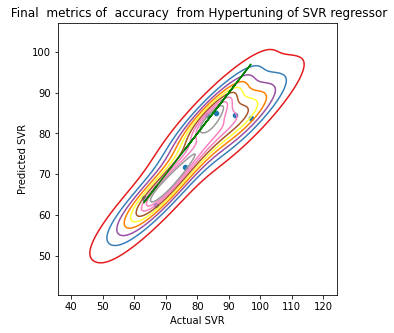

In [130]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test,y=svrpred,palette='Set2')
sns.kdeplot(x=y_test,y=svrpred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual SVR")
plt.ylabel("Predicted SVR")
plt.title(" Final  metrics of  accuracy  from Hypertuning of SVR regressor")
plt.show()

we got 71 accuracy from the Support vector regressor

### Hypertuning on Random Forest Regressor

In [131]:
RFR =RandomForestRegressor()

In [132]:
parameter = {'n_estimators':[200,300,400,600],
'random_state':[80,99,100,150,110],
 'max_depth':[1,2,3,4],
 'max_samples':[0.1,0.01,0.001,1],
 'max_features':['log','sqrt']} 

In [133]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=7,n_jobs = 3,verbose = 2)

In [134]:
GridCV.fit(x_train,y_train)

Fitting 7 folds for each of 640 candidates, totalling 4480 fits


GridSearchCV(cv=7, estimator=RandomForestRegressor(), n_jobs=3,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_features': ['log', 'sqrt'],
                         'max_samples': [0.1, 0.01, 0.001, 1],
                         'n_estimators': [200, 300, 400, 600],
                         'random_state': [80, 99, 100, 150, 110]},
             verbose=2)

In [135]:
GridCV.best_params_

{'max_depth': 1,
 'max_features': 'sqrt',
 'max_samples': 0.1,
 'n_estimators': 200,
 'random_state': 110}

In [136]:
Best_mod2 = RandomForestRegressor(n_estimators=200,max_features='sqrt',random_state= 110, max_depth= 1, max_samples = 0.1)
Best_mod2.fit(x_train, y_train)

RandomForestRegressor(max_depth=1, max_features='sqrt', max_samples=0.1,
                      n_estimators=200, random_state=110)

In [137]:
rfrpred = Best_mod2.predict(x_test)

acc = r2_score(y_test,rfrpred)
print(acc*100)

12.150818667268393


So we can see that the SVR is giving the best prediction after Hypertuning which is 71% so we are taking as our final model

# Saving the Predictive Model

In [138]:
import joblib
joblib.dump(Best_mod,"BestModelbase.pkl")

['BestModelbase.pkl']

# Conclusion and the prediction by the model

In [139]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Best_mod.predict(x_test))
Base_mdl = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Base_mdl

,Original,Predicted
0,67,62.546702
1,63,64.056678
2,97,83.861243
3,76,71.682856
4,83,84.487850
5,92,84.493773
6,86,84.974739


Text(0.5, 1.0, 'Original vs predicted  graph')

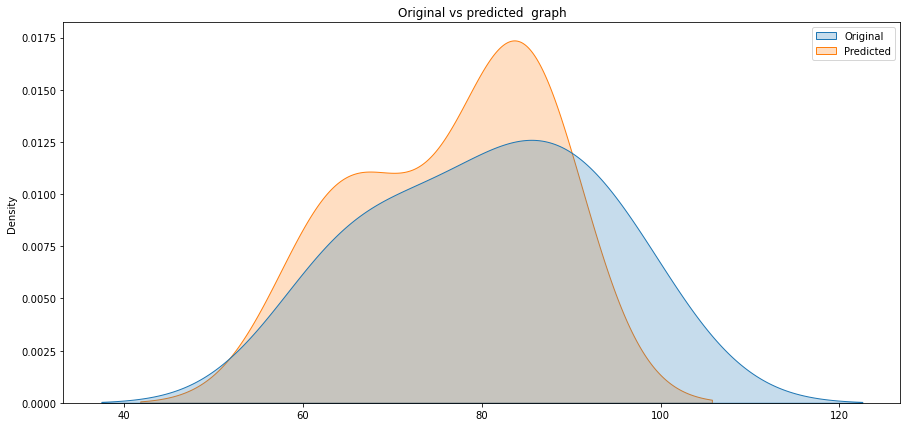

In [141]:
plt.figure(figsize=(15,7))
sns.kdeplot(data=Base_mdl,gridsize=500, shade=True)
plt.title('Original vs predicted  graph')